In [1]:
#Import libraries 
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("../csse_covid_19_time_series/time_series_covid19_confirmed_us.csv")
df.tail(5)

UID iso2 iso3  code3     FIPS      Admin2  Province_State  \
3248  84090053   US  USA    840  90053.0  Unassigned      Washington   
3249  84090054   US  USA    840  90054.0  Unassigned   West Virginia   
3250  84090055   US  USA    840  90055.0  Unassigned       Wisconsin   
3251  84090056   US  USA    840  90056.0  Unassigned         Wyoming   
3252  84099999   US  USA    840  99999.0         NaN  Grand Princess   

     Country_Region  Lat  Long_   ...   3/27/20  3/28/20  3/29/20  3/30/20  \
3248             US  0.0    0.0   ...        67        0      125      274   
3249             US  0.0    0.0   ...         0        0        0        0   
3250             US  0.0    0.0   ...        61        0        0        0   
3251             US  0.0    0.0   ...         0        0        0        0   
3252             US  0.0    0.0   ...        28      103      103      103   

      3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  
3248      274     303     344     501     483     533  
3249        0       0       0       0       0       0  
3250        0       0       0       0       0       0  
3251        0       0       0       0       0       0  
3252      103     103     103     103     103     103  

[5 rows x 86 columns]

In [3]:
df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4

The data needs to be transformed for it to be useful. 

In [7]:
# Transform the data using padas melt
df_melt = pd.melt(df, id_vars=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'], var_name='date', value_name='numcases')

df_melt.tail(10)

UID iso2 iso3  code3     FIPS      Admin2  Province_State  \
243965  84090047   US  USA    840  90047.0  Unassigned       Tennessee   
243966  84090048   US  USA    840  90048.0  Unassigned           Texas   
243967  84090049   US  USA    840  90049.0  Unassigned            Utah   
243968  84090050   US  USA    840  90050.0  Unassigned         Vermont   
243969  84090051   US  USA    840  90051.0  Unassigned        Virginia   
243970  84090053   US  USA    840  90053.0  Unassigned      Washington   
243971  84090054   US  USA    840  90054.0  Unassigned   West Virginia   
243972  84090055   US  USA    840  90055.0  Unassigned       Wisconsin   
243973  84090056   US  USA    840  90056.0  Unassigned         Wyoming   
243974  84099999   US  USA    840  99999.0         NaN  Grand Princess   

       Country_Region  Lat  Long_                   Combined_Key    date  \
243965             US  0.0    0.0      Unassigned, Tennessee, US  4/5/20   
243966             US  0.0    0.0          Unassigned, Texas, US  4/5/20   
243967             US  0.0    0.0           Unassigned, Utah, US  4/5/20   
243968             US  0.0    0.0        Unassigned, Vermont, US  4/5/20   
243969             US  0.0    0.0       Unassigned, Virginia, US  4/5/20   
243970             US  0.0    0.0     Unassigned, Washington, US  4/5/20   
243971             US  0.0    0.0  Unassigned, West Virginia, US  4/5/20   
243972             US  0.0    0.0      Unassigned, Wisconsin, US  4/5/20   
243973             US  0.0    0.0        Unassigned, Wyoming, US  4/5/20   
243974             US  0.0    0.0             Grand Princess, US  4/5/20   

        numcases  
243965        86  
243966         0  
243967         2  
243968        13  
243969         3  
243970       533  
243971         0  
243972         0  
243973         0  
243974       103

In [6]:
df_melt.dtypes

UID                 int64
iso2               object
iso3               object
code3               int64
FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
Combined_Key       object
date               object
numcases            int64
dtype: object

In [11]:
# remove unused columns
df_melt = df_melt[['Country_Region', 'Province_State', 'date', 'numcases']]
df_melt.tail()

Country_Region  Province_State    date  numcases
243970             US      Washington  4/5/20       533
243971             US   West Virginia  4/5/20         0
243972             US       Wisconsin  4/5/20         0
243973             US         Wyoming  4/5/20         0
243974             US  Grand Princess  4/5/20       103

In [12]:
# Export transformed data as CSV
df_melt.to_csv("transformed-us-confirmed-cases.csv", index=False)

## Visualizations

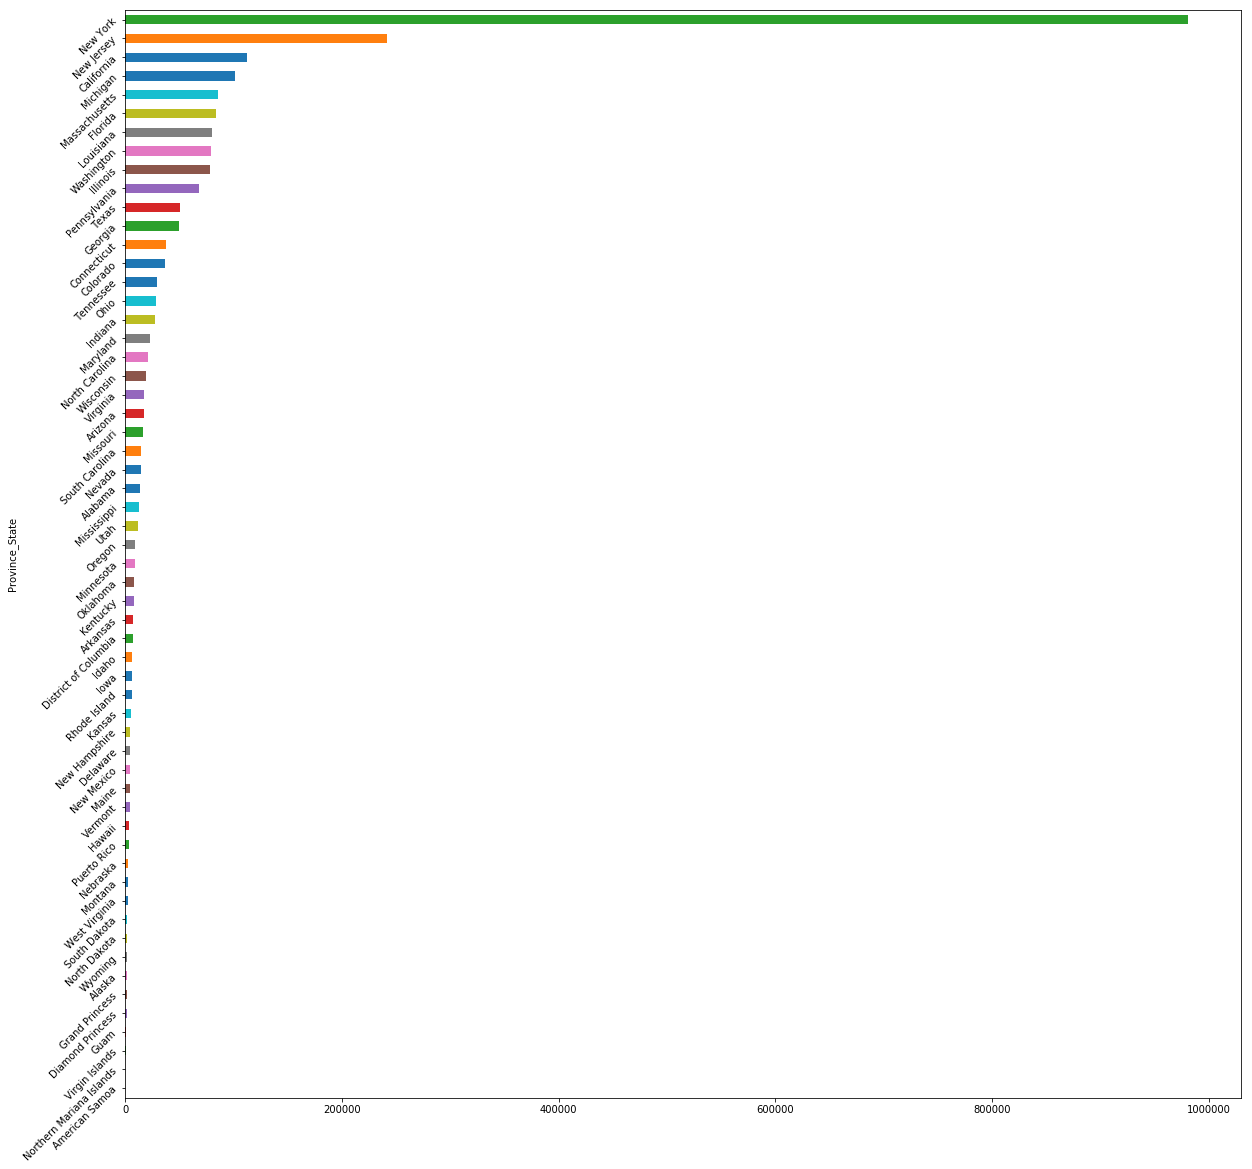

In [21]:
df_melt.groupby('Province_State').sum()['numcases'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20), rot=45);


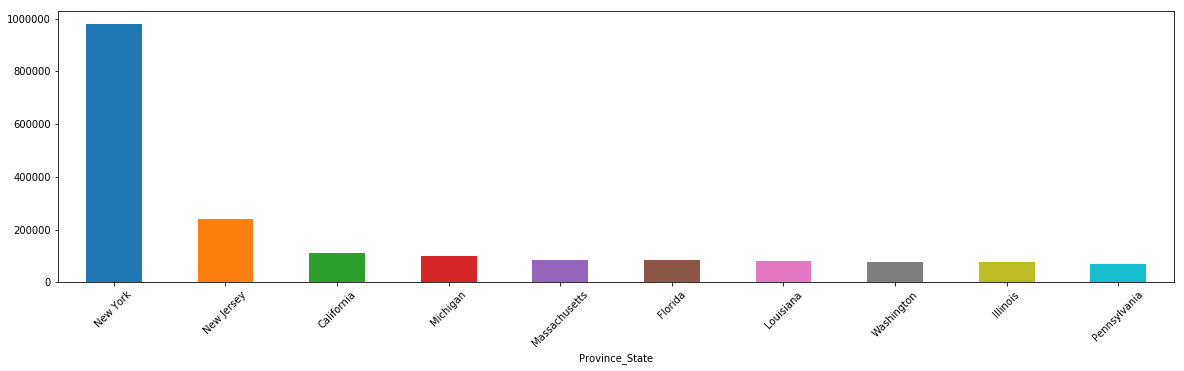

In [23]:
df_melt.groupby('Province_State').sum()['numcases'].sort_values().nlargest(10).plot(kind='bar', figsize=(20,5), rot=45);